# Exploratory Data Analysis (EDA)

In this part, we will analyse correlations between the variables used to model the MarketPlace simulator. First, we will import the figures generated by **Matlab** when the **P2P_EXCRATE.m** function located in the /Source_Code directory is executed. Then, we will continue by further analysing the data generated *TradeLog_all.csv*.

This notebook is structured as:
    1. How do traders choose their exchange rate?
    2. Comparing the IBR with the best available rate over time
    3. How long it takes a matching event for a given ER?
    4. Results and discussion

## Bird-eye's view on the data generated


In [89]:
import graphlab 
data_rolled = graphlab.SFrame.read_csv('Source_Code/data_and_graphics/TradeLog_relinfo.csv');
data_all = graphlab.SFrame.read_csv('Source_Code/data_and_graphics/TradeLog_all.csv');

Finished parsing file /Users/meloamaury/Documents/Big_data_specialization/Projects_GitHub/FOREX_p2p_simulation_ML/Source_Code/data_and_graphics/TradeLog_relinfo.csv

Parsing completed. Parsed 100 lines in 0.061896 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,float,float,float,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/meloamaury/Documents/Big_data_specialization/Projects_GitHub/FOREX_p2p_simulation_ML/Source_Code/data_and_graphics/TradeLog_relinfo.csv

Parsing completed. Parsed 12147 lines in 0.036541 secs.

Finished parsing file /Users/meloamaury/Documents/Big_data_specialization/Projects_GitHub/FOREX_p2p_simulation_ML/Source_Code/data_and_graphics/TradeLog_all.csv

Parsing completed. Parsed 100 lines in 0.104686 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,int,int,float,float,float,int,int,float,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/meloamaury/Documents/Big_data_specialization/Projects_GitHub/FOREX_p2p_simulation_ML/Source_Code/data_and_graphics/TradeLog_all.csv

Parsing completed. Parsed 26862 lines in 0.112015 secs.

In [90]:
# Summary of the data. Here each entry corresponds to a unique user
data_rolled 

CurrencySell,avgIBR,OrdRate_IBR,wavgMatchRate_IBR,AmountOrd,TimeStampPlaced,Time_diff
EURO,0.773689256776,0.7745,0.774713356058,87400,831,0
EURO,0.771963297865,0.7719,0.77415853297,127800,8525,0
EURO,0.77397874172,0.7732,0.776518092872,108500,4678,0
EURO,0.773692701357,0.7746,0.777194102518,134300,459,62
GBP,1.29389386471,1.2905,1.2936610608,16600,0,6021
EURO,0.775299220054,0.7769,0.778215338947,127100,1319,2313
GBP,1.29549067472,1.2917,1.29256014631,43700,0,4022
GBP,1.28747541741,1.2835,1.28516110153,140200,0,5560
EURO,0.773355464423,0.7697,0.775855380557,37000,8402,0
GBP,1.28875250701,1.2896,1.29265770424,45000,0,2640


In [91]:
# Summary of the data. Here each entry corresponds to a unique tradeLog of total or partial matching event
data_all

TradeID,Currency_sell,Currency_buy,userID,QuickTrade,IB_Rate,Rate_ordered,Rate_matched,TimeStampPlaced
10.1.0-1,GBP,EURO,10,0,1.29077687306,1.291,1.29132231405,1
11.2.0-2,EURO,GBP,11,0,0.774727236654,0.7744,0.774593338497,2
25.6.0-1,GBP,EURO,25,0,1.29108244071,1.2873,1.29382843835,6
25.6.0-2,GBP,EURO,25,0,1.29108244071,1.2873,1.2873,6
25.6.0-3,EURO,GBP,25,0,0.774543877654,0.7729,0.776819700148,6
24.6.1-4,EURO,GBP,24,1,0.774543877654,0.776819700148,0.776819700148,6
24.6.1-5,EURO,GBP,24,1,0.774543877654,0.770671158266,0.770671158266,6
28.7.0-1,GBP,EURO,28,0,1.29101086481,1.2893,1.29215660938,7
28.7.0-2,GBP,EURO,28,0,1.29101086481,1.2893,1.29132231405,7
27.7.0-3,EURO,GBP,27,0,0.77458681972,0.7739,0.77561467463,7


## 1. How do traders choose their exchange rate?
#### There are two main indicators for the traders to choose a particular exchange rate. First, they look at what the banks are paying, i.e., the interbank exchange rate (IBR). Second they look at the exchage rate that other traders are choosing.

a) IBR: as discussed in Part 1 of this project, one of the first things that we need to define to create the MarketPlace simulator is a model for the IBR. Here I assume that IBR follows a *Brownian motion* type of curve. This is a reasonable model that is usually used in "real life" data. 

b) Behavior of other users: there will be several traders coming on both sides of the MarketPlace (Euro side and GBP side) each of them with their own exchange rate. The simulator sort all the traders by their exchange rate and add up the amount of cash for each exchange rate. Therefore in the queue system, each exchange rate seen corresponds to several traders. This is shown in the Fig below. 
    - The exchange rates on both sides of the market are sorted and positioned with respect to the IBR. The distribution shows how the exchange rates of the traders are chosen, i.e., followin a random distribution (either normal or lognormal) with average 0.5% above the IBR (for selling side) and the equivalent (since the buying side exchange rate is 1/GBP) is true for the buying side. This is to show that most of the traders would like to have a deal that pays better than the IBR. 
    - In other words, traders on the selling side who order high exchange rates are the greedy ones and on the buying side, the ones who order very low exchange rate are also the greedy ones but on the Euro side.
    - There is a cutof at 0.5% below the IBR (for the selling side) ad the equivalent for the buying side. This means that any trader who comes and places an order with exchange rate below 0.5% the IBR, the system automatically will match the trader. Therefore, none of them will get a deal worse than 0.5% below the IBR.

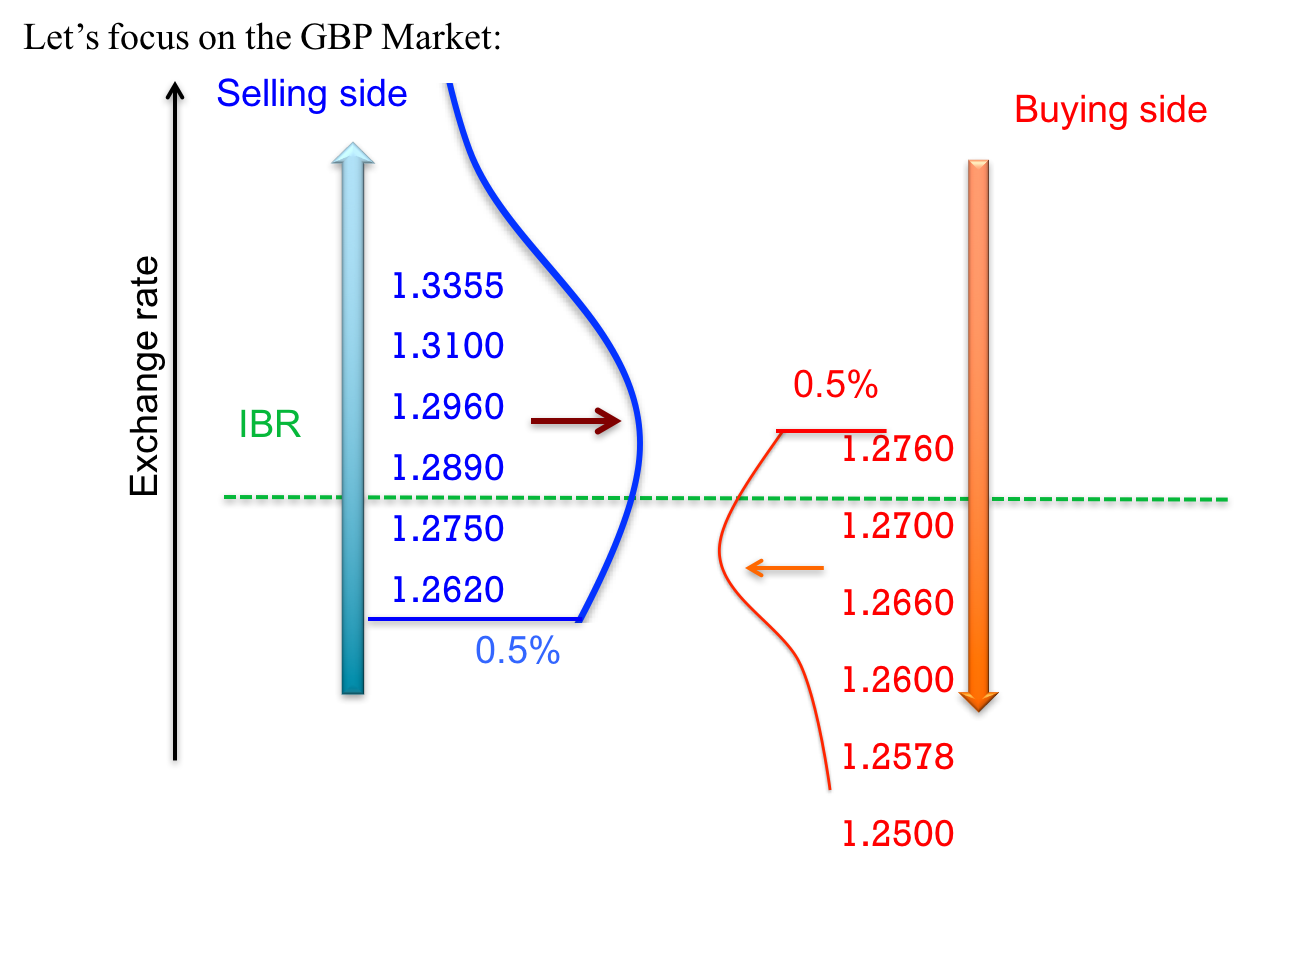

In [92]:
from IPython.display import Image
Image(filename='Extra_graphics/selling_and_buying_cartoon.png')

The next cartoon shows the *allowed* matching events between traders on both sides of the market. The process starts with lowest exchange rates on both sides as represented by the arrows. For instance, the traders on the GBP market with exchange rate 1.2620 will have priority to match the traders on the Euro market with 1.2760. 
**Master Note**: the rate 1.2760 means that this is the exchange rate that the buying side (Euro market) is willing to pay and the rate 1.2630 is the rate that the selling side (GBP market) is willing to sell. Therfore, the rate of 1.2760 from the point of view of a trader in the GBP market that initially ordered 1.2620 is a *great deal* because he will sell his GBP for a higher price. The same is true for the trader in the Euro side, he is willing to pay 1.2760 but he will pay only 1.2620.

When the amount of cash of 1.2760 ends, the next *best available* will be 1.2700. With this, the traders will have opportunity to get equal or better rates than they have ordered.


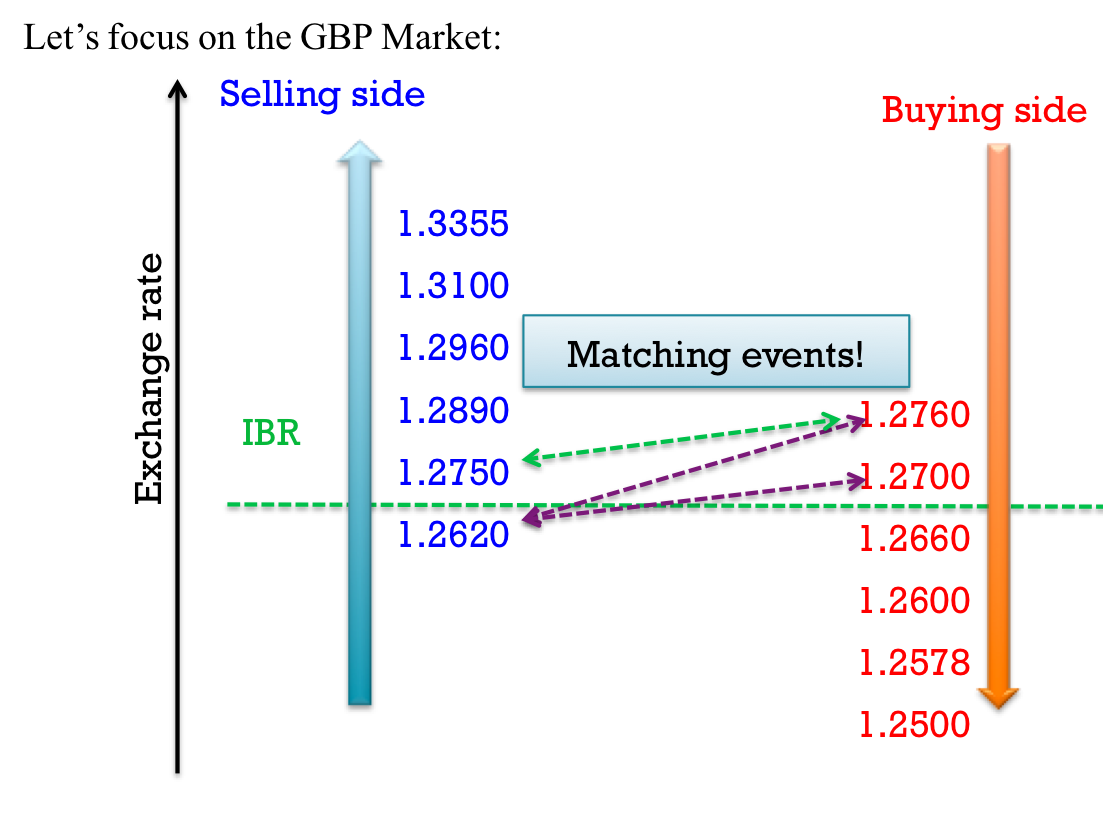

In [93]:
Image(filename='Extra_graphics/matching_events_cartoon.png')

When the overlaping exchange rates are all matched, there will be a gap and no matching events can occur, thus the next time spet in the simulation is called. This is ilustrated in the cartoon below.

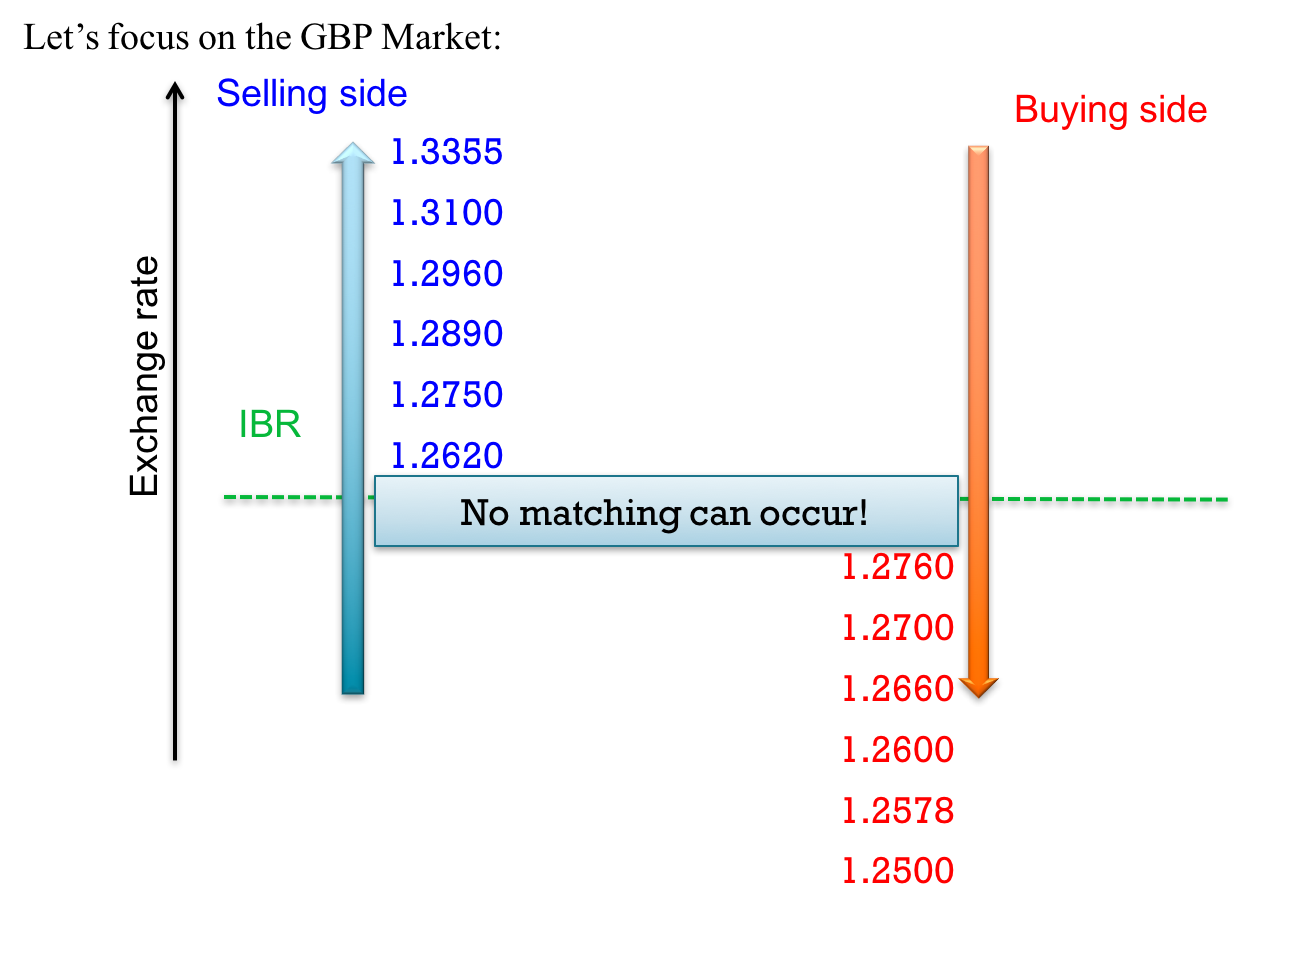

In [94]:
Image(filename='Extra_graphics/no_matching_events_cartoon.png')

## 2. Comparing the IBR with the best available rate over time
In the picture below, I show the time series for the IBR with the best available rate on both sides of the market where the sampling of exchange rates for the traders is chosen following a **normal distribution**. As we can see, when the market is in favor of the GBP, i.e., GBP_to_Euro exchange rate is increasing, the best available in the GPB follows the trend whereas the best available in the Euro market goes down.

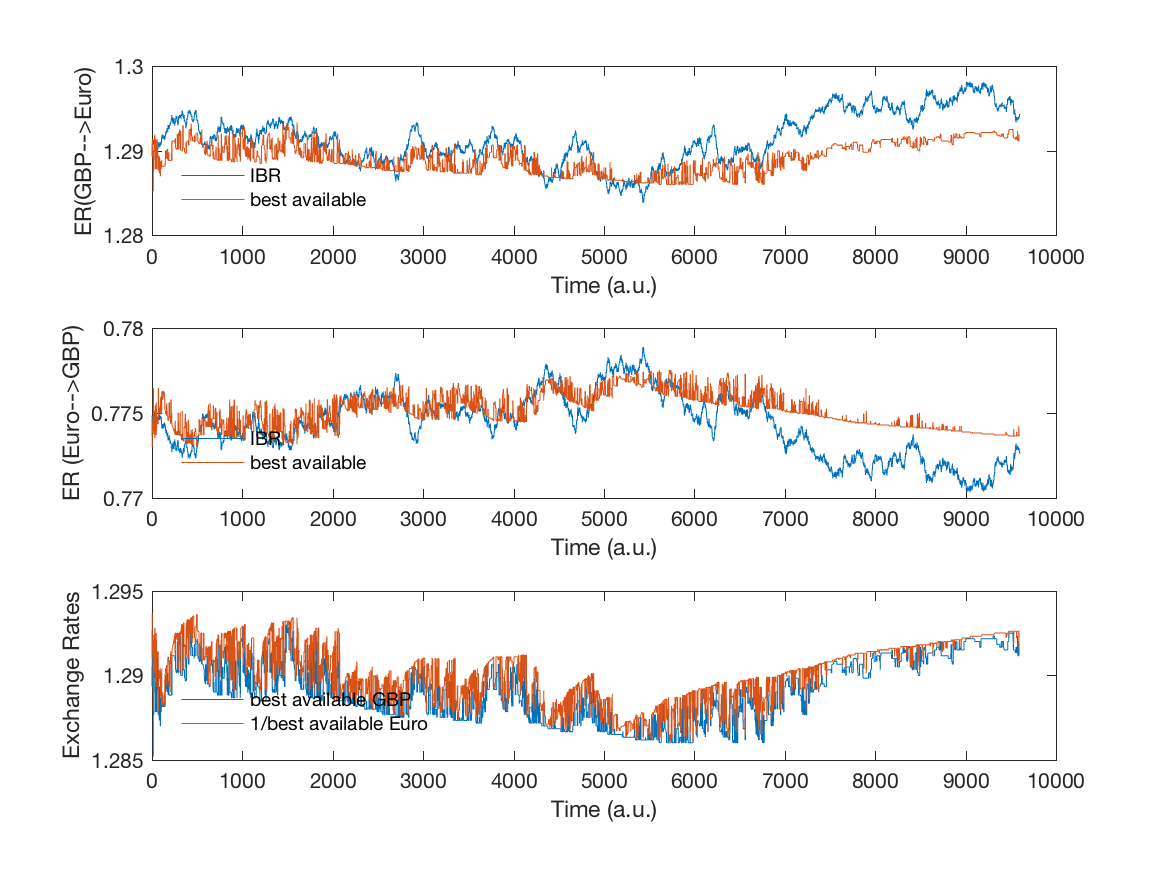

In [95]:
Image(filename='Source_Code/data_and_graphics/fig1.png')

## 3. How long it takes a matching event for a given ER?
* In the following, we show some plots for using the **dayX_relinfo.csv**, ie, the rolled up partial matching events for each user in a single matching event. Therefore, the matching rate for a user will be the average rate for all his partial matching weighted by the amount of cash on each partial matching, *W-avgMatched*. The *avgIBR*  is the the average of the IBR over the time that it took to complete the full matching of the total cash of a particular trader. The color code is time difference between the time the trader left the system (had his matching completed) and the time he entered the system. 

* Similar plots for the **dayX_allinfo.csv**, ie, the data without aggregation per each trader. 


### avgMatched rate, avgIBR and Ordered rate

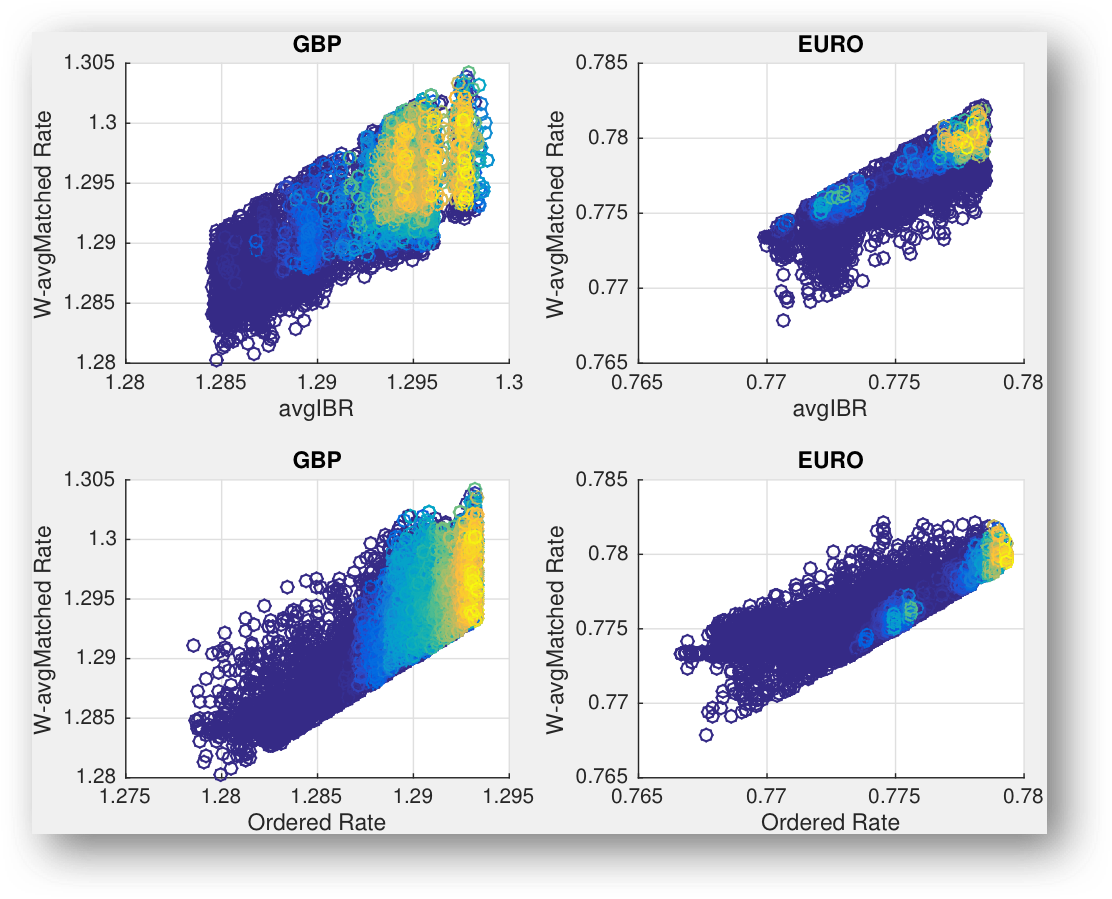

In [96]:
Image(filename='Source_Code/data_and_graphics/avgrate_avgIBR_timeDiff.png')

### Partial matching events: ordered rate, matched rate, IBR 

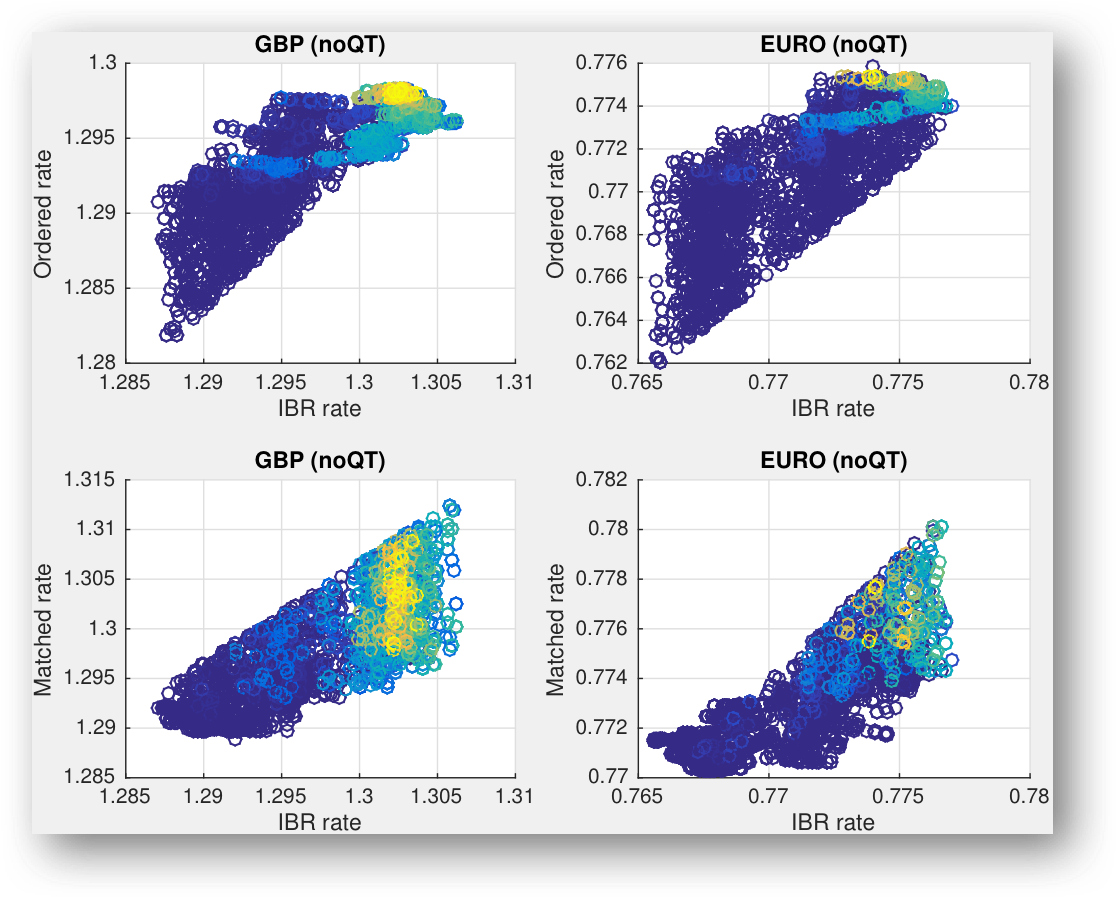

In [97]:
Image(filename='Source_Code/data_and_graphics/rates_IBR_timeDiff.png')

### Amount of cash, matched exchange rate

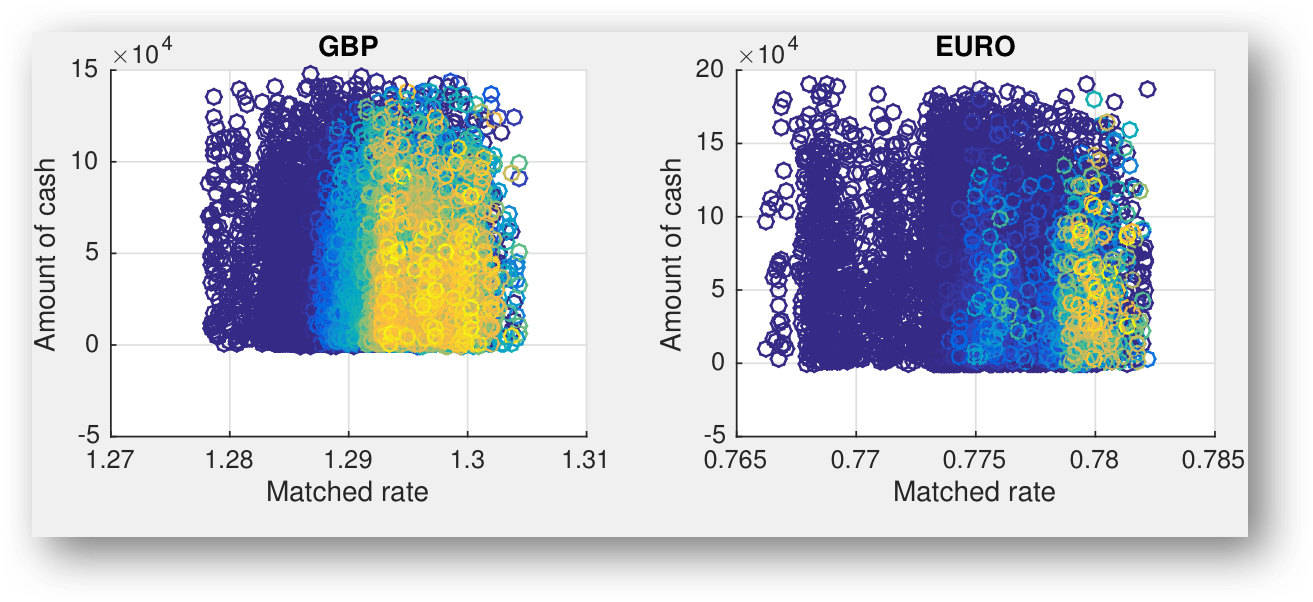

In [98]:
Image(filename='Source_Code/data_and_graphics/cash_amount_effect.png')

## 4. Results and Discussion
* As expected, the higher the IBR the higher will be the matched rate since the users use the IBR as a guidance to decide which exchange rate is best for them.
* There is a clear correlation of the time that it takes to have a matching event (color code) and the IBR and ordered rate. The higher the rate chosen, the longer it will take for a matching to occur.
* Traders with *quicktraders* status will always have matchings with the same exchange rate paid by the system (0.5% below the IBR) and will be matched instantaneouly, therefore they do not contribute for the correlations displayed below. However, they do contribute (in rare occasions) to remove traders from the system who were waiting for a long time. This is possible if all the matching possibilities betwwen traders in queuing system is exhausted. Then for that particular point in time, if there is any *quicktraders* they also have the chance to match the traders in the queueing system with better rates, and again, everybody is happy!!!!!